### Questions

1. Show the likelihood of dying if you contract covid in US by year.
2. Show the percentage of population got covid in the US.
3. US highest infestion rate compared to population
4. Countries with highest death count per population
5. Showing continent with the highest death count per population.

#### Import Necessary Liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
pd.options.mode.chained_assignment = None  # default='warn'

#### Load Datasets and Verify

In [2]:
# Load Dataset

covid_deaths = pd.read_csv("/Users/harry/Desktop/dataAnalysis_Projects/Covid_data/CovidDeaths.csv")
covid_vac = pd.read_csv("/Users/harry/Desktop/dataAnalysis_Projects/Covid_data/CovidVaccinations.csv")

In [3]:
# Check the column names on the covid_deaths dataset
covid_deaths.columns.values.tolist()

['iso_code',
 'continent',
 'location',
 'date',
 'population',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million']

In [4]:
# Check the column names in the covid_vac dataset
covid_vac.columns.values.tolist()

['iso_code',
 'continent',
 'location',
 'date',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'total_boosters_per_hundred',
 'new_vaccinations_smoothed_per_million',
 'new_people_vaccinated_smoothed',
 'new_people_vaccinated_smoothed_per_hundred',
 'stringency_index',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_thousand',
 'life_expectancy',
 'human_development_index',
 'excess_mortality_c

In [5]:
# view the covid_deaths dataset
covid_deaths

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
0,AFG,Asia,Afghanistan,2/24/2020,39835428.0,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/2020,39835428.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/2020,39835428.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/2020,39835428.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/2020,39835428.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160232,ZWE,Africa,Zimbabwe,2/3/2022,15092171.0,230170.0,158.0,153.429,5357.0,5.0,...,0.312,0.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160233,ZWE,Africa,Zimbabwe,2/4/2022,15092171.0,230170.0,0.0,119.571,5357.0,0.0,...,0.227,0.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160234,ZWE,Africa,Zimbabwe,2/5/2022,15092171.0,230402.0,232.0,141.000,5362.0,5.0,...,0.275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160235,ZWE,Africa,Zimbabwe,2/6/2022,15092171.0,230402.0,NaN,NaN,5362.0,0.0,...,0.237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# view the covid_vac
covid_vac

,iso_code,continent,location,date,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2/24/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160232,ZWE,Africa,Zimbabwe,2/3/2022,NaN,1994516.0,132.156,NaN,22075.0,1.463,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
160233,ZWE,Africa,Zimbabwe,2/4/2022,NaN,NaN,NaN,NaN,21994.0,1.457,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
160234,ZWE,Africa,Zimbabwe,2/5/2022,NaN,2000510.0,132.553,NaN,22058.0,1.462,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
160235,ZWE,Africa,Zimbabwe,2/6/2022,NaN,NaN,NaN,NaN,NaN,NaN,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


#### Merge Datasets

In [7]:
# Copy 2 columns from covid_vac and add it to covid_death.
covid = pd.merge(covid_deaths,
                 covid_vac [['iso_code', 'continent', 'location', 'date', 'people_fully_vaccinated', 'new_vaccinations']],
                 on =['iso_code', 'continent', 'location', 'date'],
                 how='outer')

covid

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,people_fully_vaccinated,new_vaccinations
0,AFG,Asia,Afghanistan,2/24/2020,39835428.0,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/2020,39835428.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/2020,39835428.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/2020,39835428.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/2020,39835428.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160232,ZWE,Africa,Zimbabwe,2/3/2022,15092171.0,230170.0,158.0,153.429,5357.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3314748.0,7022.0
160233,ZWE,Africa,Zimbabwe,2/4/2022,15092171.0,230170.0,0.0,119.571,5357.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3319917.0,10983.0
160234,ZWE,Africa,Zimbabwe,2/5/2022,15092171.0,230402.0,232.0,141.000,5362.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3322623.0,5255.0
160235,ZWE,Africa,Zimbabwe,2/6/2022,15092171.0,230402.0,NaN,NaN,5362.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3324206.0,2969.0


#### Cleaning the Dataset.

In [8]:
# replace the N/A value with 0.0
covid = covid.replace(np.nan, 0)
covid

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,people_fully_vaccinated,new_vaccinations
0,AFG,Asia,Afghanistan,2/24/2020,39835428.0,5.0,5.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2/25/2020,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2/26/2020,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2/27/2020,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2/28/2020,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160232,ZWE,Africa,Zimbabwe,2/3/2022,15092171.0,230170.0,158.0,153.429,5357.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3314748.0,7022.0
160233,ZWE,Africa,Zimbabwe,2/4/2022,15092171.0,230170.0,0.0,119.571,5357.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3319917.0,10983.0
160234,ZWE,Africa,Zimbabwe,2/5/2022,15092171.0,230402.0,232.0,141.000,5362.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3322623.0,5255.0
160235,ZWE,Africa,Zimbabwe,2/6/2022,15092171.0,230402.0,0.0,0.000,5362.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3324206.0,2969.0


In [9]:
# drop unneccessary columns
# covid = covid.drop( columns =
#  [
#     'new_cases_smoothed',
#     'new_deaths',
#     'new_deaths_smoothed',                   
#     'total_cases_per_million',             
#     'new_cases_per_million',             
#     'new_cases_smoothed_per_million',     
#     'total_deaths_per_million',     
#     'new_deaths_per_million',           
#     'new_deaths_smoothed_per_million',       
#     'reproduction_rate',     
#     'icu_patients',                   
#     'icu_patients_per_million',        
#     'hosp_patients',                  
#     'hosp_patients_per_million',            
#     'weekly_icu_admissions',               
#     'weekly_icu_admissions_per_million',    
#     'weekly_hosp_admissions',     
#     'weekly_hosp_admissions_per_million'
#  ]
# )


In [10]:
covid.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
population                            float64
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million         

In [11]:
covid.shape

(160237, 28)

In [12]:
# Remove everything that is in a country in the location column
#df_list = [
#     'Africa', 'Asia', 'World', 
#     'Upper middle income', 'Oceania', 'Lower income', 
#     'Lower middle income', 'International', 'High income',
#     'Europe', 'European Union', 'North America', 'South America']
# covid = covid[~covid.location.isin(df_list)]
# covid

In [13]:
# Extreat the month and year from date into a new column.
#covid['year'] = pd.to_datetime(covid['date']).dt.year
covid['month_year'] = pd.to_datetime(covid['date']).dt.strftime('%m/%Y')
covid

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,people_fully_vaccinated,new_vaccinations,month_year
0,AFG,Asia,Afghanistan,2/24/2020,39835428.0,5.0,5.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/2020
1,AFG,Asia,Afghanistan,2/25/2020,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/2020
2,AFG,Asia,Afghanistan,2/26/2020,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/2020
3,AFG,Asia,Afghanistan,2/27/2020,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/2020
4,AFG,Asia,Afghanistan,2/28/2020,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160232,ZWE,Africa,Zimbabwe,2/3/2022,15092171.0,230170.0,158.0,153.429,5357.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3314748.0,7022.0,02/2022
160233,ZWE,Africa,Zimbabwe,2/4/2022,15092171.0,230170.0,0.0,119.571,5357.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3319917.0,10983.0,02/2022
160234,ZWE,Africa,Zimbabwe,2/5/2022,15092171.0,230402.0,232.0,141.000,5362.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3322623.0,5255.0,02/2022
160235,ZWE,Africa,Zimbabwe,2/6/2022,15092171.0,230402.0,0.0,0.000,5362.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3324206.0,2969.0,02/2022


In [14]:
# Covert date column to datetime.
covid['date'] = pd.to_datetime(covid['date'])

In [15]:
# remove 2022 data from the dataset.
covid = covid[covid['date'] < '2022-01-01'] 
covid

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,people_fully_vaccinated,new_vaccinations,month_year
0,AFG,Asia,Afghanistan,2020-02-24,39835428.0,5.0,5.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/2020
1,AFG,Asia,Afghanistan,2020-02-25,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/2020
2,AFG,Asia,Afghanistan,2020-02-26,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/2020
3,AFG,Asia,Afghanistan,2020-02-27,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/2020
4,AFG,Asia,Afghanistan,2020-02-28,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160194,ZWE,Africa,Zimbabwe,2021-12-27,15092171.0,205449.0,1098.0,1481.429,4908.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3113142.0,3798.0,12/2021
160195,ZWE,Africa,Zimbabwe,2021-12-28,15092171.0,207548.0,2099.0,1397.143,4940.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3115190.0,3903.0,12/2021
160196,ZWE,Africa,Zimbabwe,2021-12-29,15092171.0,207548.0,0.0,1163.429,4940.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3121776.0,11952.0,12/2021
160197,ZWE,Africa,Zimbabwe,2021-12-30,15092171.0,211728.0,4180.0,1483.429,4997.0,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12/2021


In [16]:
# replace negative values in new_cases column to 0
covid.new_cases = np.where(covid.new_cases < 0, 0, covid.new_cases)
covid

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,people_fully_vaccinated,new_vaccinations,month_year
0,AFG,Asia,Afghanistan,2020-02-24,39835428.0,5.0,5.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/2020
1,AFG,Asia,Afghanistan,2020-02-25,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/2020
2,AFG,Asia,Afghanistan,2020-02-26,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/2020
3,AFG,Asia,Afghanistan,2020-02-27,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/2020
4,AFG,Asia,Afghanistan,2020-02-28,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160194,ZWE,Africa,Zimbabwe,2021-12-27,15092171.0,205449.0,1098.0,1481.429,4908.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3113142.0,3798.0,12/2021
160195,ZWE,Africa,Zimbabwe,2021-12-28,15092171.0,207548.0,2099.0,1397.143,4940.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3115190.0,3903.0,12/2021
160196,ZWE,Africa,Zimbabwe,2021-12-29,15092171.0,207548.0,0.0,1163.429,4940.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3121776.0,11952.0,12/2021
160197,ZWE,Africa,Zimbabwe,2021-12-30,15092171.0,211728.0,4180.0,1483.429,4997.0,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12/2021


In [17]:
# arrange the values in new_cases column in ascending order.
covid.sort_values(['new_cases'],ascending=True)

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,people_fully_vaccinated,new_vaccinations,month_year
80088,LAO,Asia,Laos,2020-10-26,7.379358e+06,24.0,0.0,0.143,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,10/2020
33125,COG,Africa,Congo,2021-12-14,5.657017e+06,19066.0,0.0,0.000,359.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,12/2021
33126,COG,Africa,Congo,2021-12-15,5.657017e+06,19066.0,0.0,0.000,359.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,12/2021
96386,MCO,Europe,Monaco,2020-06-08,3.952000e+04,99.0,0.0,0.000,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,06/2020
33128,COG,Africa,Congo,2021-12-17,5.657017e+06,19179.0,0.0,16.143,365.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,12/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64247,OWID_HIC,0,High income,2021-12-29,1.214930e+09,132030814.0,1467042.0,877085.000,1935944.0,4986.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.531172e+08,6830853.0,12/2021
64248,OWID_HIC,0,High income,2021-12-30,1.214930e+09,133670706.0,1639892.0,996417.714,1940023.0,4079.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.540999e+08,6832513.0,12/2021
158147,OWID_WRL,0,World,2021-12-31,7.874966e+09,288334458.0,1701330.0,1320205.571,5439754.0,5981.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.890107e+09,32164777.0,12/2021
158145,OWID_WRL,0,World,2021-12-29,7.874966e+09,284695661.0,1717655.0,1062596.000,5425624.0,7999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.858529e+09,39175754.0,12/2021


### Explorary Analysis

Question 1. Show the likelihood of dying if you contract covid in US by year

In [18]:
# Get the percentage of death.
#covid.loc.__setitem__(('Death_Percentage'), (covid['total_deaths'].div(covid['total_cases'].values)).mul(100) )
covid.loc[:, ('Death_Percentage')]= (covid['total_deaths'].div(covid['total_cases'].values)).mul(100)
covid

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,people_fully_vaccinated,new_vaccinations,month_year,Death_Percentage
0,AFG,Asia,Afghanistan,2020-02-24,39835428.0,5.0,5.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/2020,0.000000
1,AFG,Asia,Afghanistan,2020-02-25,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/2020,0.000000
2,AFG,Asia,Afghanistan,2020-02-26,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/2020,0.000000
3,AFG,Asia,Afghanistan,2020-02-27,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/2020,0.000000
4,AFG,Asia,Afghanistan,2020-02-28,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/2020,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160194,ZWE,Africa,Zimbabwe,2021-12-27,15092171.0,205449.0,1098.0,1481.429,4908.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3113142.0,3798.0,12/2021,2.388914
160195,ZWE,Africa,Zimbabwe,2021-12-28,15092171.0,207548.0,2099.0,1397.143,4940.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3115190.0,3903.0,12/2021,2.380172
160196,ZWE,Africa,Zimbabwe,2021-12-29,15092171.0,207548.0,0.0,1163.429,4940.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3121776.0,11952.0,12/2021,2.380172
160197,ZWE,Africa,Zimbabwe,2021-12-30,15092171.0,211728.0,4180.0,1483.429,4997.0,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12/2021,2.360104


In [19]:
# select United State data
US = covid.query('location.str.contains("United S")', engine='python')
US

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,people_fully_vaccinated,new_vaccinations,month_year,Death_Percentage
151471,USA,North America,United States,2020-01-22,332915074.0,1.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,01/2020,0.000000
151472,USA,North America,United States,2020-01-23,332915074.0,1.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,01/2020,0.000000
151473,USA,North America,United States,2020-01-24,332915074.0,2.0,1.0,0.000,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,01/2020,0.000000
151474,USA,North America,United States,2020-01-25,332915074.0,2.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,01/2020,0.000000
151475,USA,North America,United States,2020-01-26,332915074.0,5.0,3.0,0.000,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,01/2020,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152176,USA,North America,United States,2021-12-27,332915074.0,52862374.0,509110.0,243107.429,820806.0,1884.0,...,74692.0,224.358,0.0,0.0,67971.0,204.169,206253136.0,1484712.0,12/2021,1.552723
152177,USA,North America,United States,2021-12-28,332915074.0,53218883.0,356509.0,268512.143,823204.0,2398.0,...,79671.0,239.313,0.0,0.0,73009.0,219.302,206488028.0,1640654.0,12/2021,1.546827
152178,USA,North America,United States,2021-12-29,332915074.0,53717795.0,498912.0,305338.571,825516.0,2312.0,...,85514.0,256.864,0.0,0.0,79214.0,237.941,206718747.0,1624355.0,12/2021,1.536764
152179,USA,North America,United States,2021-12-30,332915074.0,54306641.0,588846.0,350878.571,827048.0,1532.0,...,89961.0,270.222,0.0,0.0,85630.0,257.213,206927473.0,1483826.0,12/2021,1.522922


In [20]:
# Select few columns
US = US.loc[:, US.columns.isin(['location', 'date', 'month_year', 'total_cases', 
     'total_deaths', 'Death_Percentage'])]
US

,location,date,total_cases,total_deaths,month_year,Death_Percentage
151471,United States,2020-01-22,1.0,0.0,01/2020,0.000000
151472,United States,2020-01-23,1.0,0.0,01/2020,0.000000
151473,United States,2020-01-24,2.0,0.0,01/2020,0.000000
151474,United States,2020-01-25,2.0,0.0,01/2020,0.000000
151475,United States,2020-01-26,5.0,0.0,01/2020,0.000000
...,...,...,...,...,...,...
152176,United States,2021-12-27,52862374.0,820806.0,12/2021,1.552723
152177,United States,2021-12-28,53218883.0,823204.0,12/2021,1.546827
152178,United States,2021-12-29,53717795.0,825516.0,12/2021,1.536764
152179,United States,2021-12-30,54306641.0,827048.0,12/2021,1.522922


In [21]:
# Get the average
US_mean = pd.pivot_table(data=US, index='month_year', values='Death_Percentage', aggfunc=np.mean)
US_mean

,Death_Percentage
month_year,
01/2020,0.000000
01/2021,1.692858
02/2020,0.137931
02/2021,1.750296
03/2020,3.463369
03/2021,1.806086
04/2020,5.030303
04/2021,1.786633
05/2020,6.184839


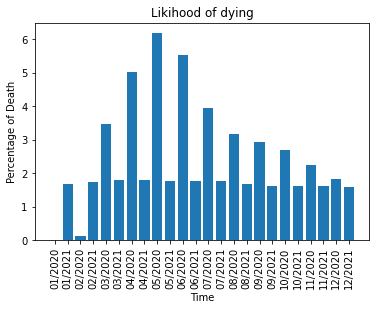

In [22]:
#visualization
plt.bar(US_mean.index, US_mean['Death_Percentage'])
plt.xticks(rotation= 'vertical', size=10)
plt.title("Likihood of dying")
plt.ylabel("Percentage of Death")
plt.xlabel("Time")
plt.show()

Question 2. Show the percentage of population got covid.

In [23]:
# create a new column
covid.loc[:, ('populationGotCovid')]= (covid['total_cases'].div(covid['population'].values)).mul(100)
covid

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,people_fully_vaccinated,new_vaccinations,month_year,Death_Percentage,populationGotCovid
0,AFG,Asia,Afghanistan,2020-02-24,39835428.0,5.0,5.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/2020,0.000000,0.000013
1,AFG,Asia,Afghanistan,2020-02-25,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/2020,0.000000,0.000013
2,AFG,Asia,Afghanistan,2020-02-26,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/2020,0.000000,0.000013
3,AFG,Asia,Afghanistan,2020-02-27,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/2020,0.000000,0.000013
4,AFG,Asia,Afghanistan,2020-02-28,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/2020,0.000000,0.000013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160194,ZWE,Africa,Zimbabwe,2021-12-27,15092171.0,205449.0,1098.0,1481.429,4908.0,17.0,...,0.0,0.0,0.0,0.0,0.0,3113142.0,3798.0,12/2021,2.388914,1.361295
160195,ZWE,Africa,Zimbabwe,2021-12-28,15092171.0,207548.0,2099.0,1397.143,4940.0,32.0,...,0.0,0.0,0.0,0.0,0.0,3115190.0,3903.0,12/2021,2.380172,1.375203
160196,ZWE,Africa,Zimbabwe,2021-12-29,15092171.0,207548.0,0.0,1163.429,4940.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3121776.0,11952.0,12/2021,2.380172,1.375203
160197,ZWE,Africa,Zimbabwe,2021-12-30,15092171.0,211728.0,4180.0,1483.429,4997.0,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12/2021,2.360104,1.402900


In [24]:
# select United State 
US_popu = covid.query('location.str.contains("United S")', engine='python')
US_popu

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,people_fully_vaccinated,new_vaccinations,month_year,Death_Percentage,populationGotCovid
151471,USA,North America,United States,2020-01-22,332915074.0,1.0,0.0,0.000,0.0,0.0,...,0.000,0.0,0.0,0.0,0.000,0.0,0.0,01/2020,0.000000,3.003769e-07
151472,USA,North America,United States,2020-01-23,332915074.0,1.0,0.0,0.000,0.0,0.0,...,0.000,0.0,0.0,0.0,0.000,0.0,0.0,01/2020,0.000000,3.003769e-07
151473,USA,North America,United States,2020-01-24,332915074.0,2.0,1.0,0.000,0.0,0.0,...,0.000,0.0,0.0,0.0,0.000,0.0,0.0,01/2020,0.000000,6.007538e-07
151474,USA,North America,United States,2020-01-25,332915074.0,2.0,0.0,0.000,0.0,0.0,...,0.000,0.0,0.0,0.0,0.000,0.0,0.0,01/2020,0.000000,6.007538e-07
151475,USA,North America,United States,2020-01-26,332915074.0,5.0,3.0,0.000,0.0,0.0,...,0.000,0.0,0.0,0.0,0.000,0.0,0.0,01/2020,0.000000,1.501885e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152176,USA,North America,United States,2021-12-27,332915074.0,52862374.0,509110.0,243107.429,820806.0,1884.0,...,224.358,0.0,0.0,67971.0,204.169,206253136.0,1484712.0,12/2021,1.552723,1.587864e+01
152177,USA,North America,United States,2021-12-28,332915074.0,53218883.0,356509.0,268512.143,823204.0,2398.0,...,239.313,0.0,0.0,73009.0,219.302,206488028.0,1640654.0,12/2021,1.546827,1.598572e+01
152178,USA,North America,United States,2021-12-29,332915074.0,53717795.0,498912.0,305338.571,825516.0,2312.0,...,256.864,0.0,0.0,79214.0,237.941,206718747.0,1624355.0,12/2021,1.536764,1.613559e+01
152179,USA,North America,United States,2021-12-30,332915074.0,54306641.0,588846.0,350878.571,827048.0,1532.0,...,270.222,0.0,0.0,85630.0,257.213,206927473.0,1483826.0,12/2021,1.522922,1.631246e+01


In [25]:
# Select few columns
US_popu = US_popu.loc[:, US_popu.columns.isin(['location', 'date', 'month_year', 'total_cases', 'population', 
                                               'populationGotCovid'])]
US_popu

,location,date,population,total_cases,month_year,populationGotCovid
151471,United States,2020-01-22,332915074.0,1.0,01/2020,3.003769e-07
151472,United States,2020-01-23,332915074.0,1.0,01/2020,3.003769e-07
151473,United States,2020-01-24,332915074.0,2.0,01/2020,6.007538e-07
151474,United States,2020-01-25,332915074.0,2.0,01/2020,6.007538e-07
151475,United States,2020-01-26,332915074.0,5.0,01/2020,1.501885e-06
...,...,...,...,...,...,...
152176,United States,2021-12-27,332915074.0,52862374.0,12/2021,1.587864e+01
152177,United States,2021-12-28,332915074.0,53218883.0,12/2021,1.598572e+01
152178,United States,2021-12-29,332915074.0,53717795.0,12/2021,1.613559e+01
152179,United States,2021-12-30,332915074.0,54306641.0,12/2021,1.631246e+01


In [26]:
# Get the average
US_popuMean = pd.pivot_table(data=US_popu, index='month_year', values='populationGotCovid', aggfunc=np.mean)
US_popuMean

,populationGotCovid
month_year,
01/2020,0.000001
01/2021,7.111476
02/2020,0.000004
02/2021,8.335668
03/2020,0.010866
03/2021,8.912868
04/2020,0.198558
04/2021,9.490117
05/2020,0.438837


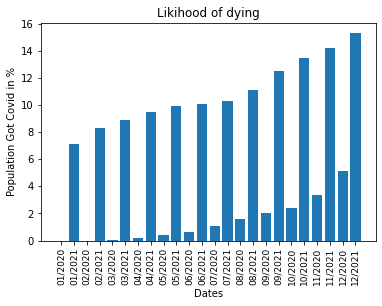

In [27]:
#Visualization
plt.bar(US_popuMean.index, US_popuMean['populationGotCovid'])
plt.xticks(rotation= 'vertical', size=9)
plt.title("People who got covid")
plt.ylabel("Population Got Covid in %")
plt.xlabel("Dates")
plt.show()

Question 3. US highest infestion rate compared to population

In [28]:
# create a new column 
covid.loc[:, ('PopulationInfected')]= (covid['total_cases'].div(covid['population'].values)).mul(100)
covid

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,people_fully_vaccinated,new_vaccinations,month_year,Death_Percentage,populationGotCovid,PopulationInfected
0,AFG,Asia,Afghanistan,2020-02-24,39835428.0,5.0,5.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,02/2020,0.000000,0.000013,0.000013
1,AFG,Asia,Afghanistan,2020-02-25,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,02/2020,0.000000,0.000013,0.000013
2,AFG,Asia,Afghanistan,2020-02-26,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,02/2020,0.000000,0.000013,0.000013
3,AFG,Asia,Afghanistan,2020-02-27,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,02/2020,0.000000,0.000013,0.000013
4,AFG,Asia,Afghanistan,2020-02-28,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,02/2020,0.000000,0.000013,0.000013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160194,ZWE,Africa,Zimbabwe,2021-12-27,15092171.0,205449.0,1098.0,1481.429,4908.0,17.0,...,0.0,0.0,0.0,0.0,3113142.0,3798.0,12/2021,2.388914,1.361295,1.361295
160195,ZWE,Africa,Zimbabwe,2021-12-28,15092171.0,207548.0,2099.0,1397.143,4940.0,32.0,...,0.0,0.0,0.0,0.0,3115190.0,3903.0,12/2021,2.380172,1.375203,1.375203
160196,ZWE,Africa,Zimbabwe,2021-12-29,15092171.0,207548.0,0.0,1163.429,4940.0,0.0,...,0.0,0.0,0.0,0.0,3121776.0,11952.0,12/2021,2.380172,1.375203,1.375203
160197,ZWE,Africa,Zimbabwe,2021-12-30,15092171.0,211728.0,4180.0,1483.429,4997.0,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12/2021,2.360104,1.402900,1.402900


In [29]:
# select US
US_max = covid.query('location.str.contains("United S")', engine='python')
US_max

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,people_fully_vaccinated,new_vaccinations,month_year,Death_Percentage,populationGotCovid,PopulationInfected
151471,USA,North America,United States,2020-01-22,332915074.0,1.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,01/2020,0.000000,3.003769e-07,3.003769e-07
151472,USA,North America,United States,2020-01-23,332915074.0,1.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,01/2020,0.000000,3.003769e-07,3.003769e-07
151473,USA,North America,United States,2020-01-24,332915074.0,2.0,1.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,01/2020,0.000000,6.007538e-07,6.007538e-07
151474,USA,North America,United States,2020-01-25,332915074.0,2.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,01/2020,0.000000,6.007538e-07,6.007538e-07
151475,USA,North America,United States,2020-01-26,332915074.0,5.0,3.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,01/2020,0.000000,1.501885e-06,1.501885e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152176,USA,North America,United States,2021-12-27,332915074.0,52862374.0,509110.0,243107.429,820806.0,1884.0,...,0.0,0.0,67971.0,204.169,206253136.0,1484712.0,12/2021,1.552723,1.587864e+01,1.587864e+01
152177,USA,North America,United States,2021-12-28,332915074.0,53218883.0,356509.0,268512.143,823204.0,2398.0,...,0.0,0.0,73009.0,219.302,206488028.0,1640654.0,12/2021,1.546827,1.598572e+01,1.598572e+01
152178,USA,North America,United States,2021-12-29,332915074.0,53717795.0,498912.0,305338.571,825516.0,2312.0,...,0.0,0.0,79214.0,237.941,206718747.0,1624355.0,12/2021,1.536764,1.613559e+01,1.613559e+01
152179,USA,North America,United States,2021-12-30,332915074.0,54306641.0,588846.0,350878.571,827048.0,1532.0,...,0.0,0.0,85630.0,257.213,206927473.0,1483826.0,12/2021,1.522922,1.631246e+01,1.631246e+01


In [30]:
# group month_year with the max PopulationInfacted
ans = US_max.groupby('month_year')['PopulationInfected'].max()
ans

month_year
01/2020     0.000002
01/2021     7.913621
02/2020     0.000008
02/2021     8.637225
03/2020     0.057696
03/2021     9.182234
04/2020     0.323026
04/2021     9.749677
05/2020     0.536914
05/2021    10.026684
06/2020     0.794446
06/2021    10.146326
07/2020     1.365204
07/2021    10.542367
08/2020     1.815569
08/2021    11.827720
09/2020     2.175148
09/2021    13.074331
10/2020     2.751266
10/2021    13.828553
11/2020     4.094041
11/2021    14.593832
12/2020     6.065614
12/2021    16.459755
Name: PopulationInfected, dtype: float64

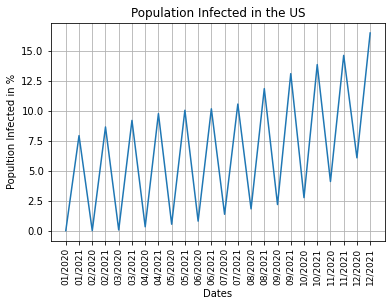

In [31]:
#visualization
tim = [hr for hr, hrs in US_max.groupby('month_year')]

plt.plot(tim, ans)
plt.xticks(tim, rotation= 'vertical', size=9)
plt.grid()
plt.title("Population Infected in the US")
plt.ylabel("Popultion Infected in %")
plt.xlabel("Dates")
plt.show()

Question 4. Countries with highest death count per population

In [32]:
#Remove every location that is not country in the location column
dp_list = [
    'Africa', 'Asia', 'World', 
    'Upper middle income', 'Oceania', 'Lower income', 
    'Lower middle income', 'International', 'High income',
    'Europe', 'European Union', 'North America', 'South America']
covid = covid[~covid.location.isin(dp_list)]
covid

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,people_fully_vaccinated,new_vaccinations,month_year,Death_Percentage,populationGotCovid,PopulationInfected
0,AFG,Asia,Afghanistan,2020-02-24,39835428.0,5.0,5.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,02/2020,0.000000,0.000013,0.000013
1,AFG,Asia,Afghanistan,2020-02-25,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,02/2020,0.000000,0.000013,0.000013
2,AFG,Asia,Afghanistan,2020-02-26,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,02/2020,0.000000,0.000013,0.000013
3,AFG,Asia,Afghanistan,2020-02-27,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,02/2020,0.000000,0.000013,0.000013
4,AFG,Asia,Afghanistan,2020-02-28,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,02/2020,0.000000,0.000013,0.000013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160194,ZWE,Africa,Zimbabwe,2021-12-27,15092171.0,205449.0,1098.0,1481.429,4908.0,17.0,...,0.0,0.0,0.0,0.0,3113142.0,3798.0,12/2021,2.388914,1.361295,1.361295
160195,ZWE,Africa,Zimbabwe,2021-12-28,15092171.0,207548.0,2099.0,1397.143,4940.0,32.0,...,0.0,0.0,0.0,0.0,3115190.0,3903.0,12/2021,2.380172,1.375203,1.375203
160196,ZWE,Africa,Zimbabwe,2021-12-29,15092171.0,207548.0,0.0,1163.429,4940.0,0.0,...,0.0,0.0,0.0,0.0,3121776.0,11952.0,12/2021,2.380172,1.375203,1.375203
160197,ZWE,Africa,Zimbabwe,2021-12-30,15092171.0,211728.0,4180.0,1483.429,4997.0,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12/2021,2.360104,1.402900,1.402900


In [33]:
# get the max deaths bylocation
pidd = covid.groupby('location')['total_deaths'].max().sort_values(ascending = False).head(10)
pidd

location
United States     827748.0
Brazil            619334.0
India             481486.0
Russia            302671.0
Mexico            299428.0
Peru              202690.0
United Kingdom    148737.0
Indonesia         144094.0
Italy             137402.0
Iran              131606.0
Name: total_deaths, dtype: float64

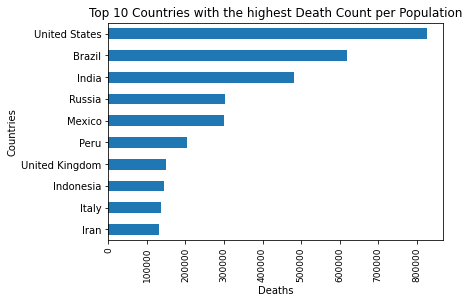

In [34]:
#visualization
xp = pidd.plot.barh(xlabel='Deaths', y='Countries')
xp.invert_yaxis()
plt.xticks(rotation= 'vertical', size=9)
plt.title("Top 10 Countries with the highest Death Count per Population")
plt.ylabel("Countries")
plt.xlabel("Deaths");


Question 5. Showing continent with the highest death count per population.

In [35]:
# get unique values in continent column
covid['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania', 0], dtype=object)

In [36]:
# filter out the 0 continent value
dxp_list = [0]
covid = covid[~covid.continent.isin(dxp_list)]
covid

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,people_fully_vaccinated,new_vaccinations,month_year,Death_Percentage,populationGotCovid,PopulationInfected
0,AFG,Asia,Afghanistan,2020-02-24,39835428.0,5.0,5.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,02/2020,0.000000,0.000013,0.000013
1,AFG,Asia,Afghanistan,2020-02-25,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,02/2020,0.000000,0.000013,0.000013
2,AFG,Asia,Afghanistan,2020-02-26,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,02/2020,0.000000,0.000013,0.000013
3,AFG,Asia,Afghanistan,2020-02-27,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,02/2020,0.000000,0.000013,0.000013
4,AFG,Asia,Afghanistan,2020-02-28,39835428.0,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,02/2020,0.000000,0.000013,0.000013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160194,ZWE,Africa,Zimbabwe,2021-12-27,15092171.0,205449.0,1098.0,1481.429,4908.0,17.0,...,0.0,0.0,0.0,0.0,3113142.0,3798.0,12/2021,2.388914,1.361295,1.361295
160195,ZWE,Africa,Zimbabwe,2021-12-28,15092171.0,207548.0,2099.0,1397.143,4940.0,32.0,...,0.0,0.0,0.0,0.0,3115190.0,3903.0,12/2021,2.380172,1.375203,1.375203
160196,ZWE,Africa,Zimbabwe,2021-12-29,15092171.0,207548.0,0.0,1163.429,4940.0,0.0,...,0.0,0.0,0.0,0.0,3121776.0,11952.0,12/2021,2.380172,1.375203,1.375203
160197,ZWE,Africa,Zimbabwe,2021-12-30,15092171.0,211728.0,4180.0,1483.429,4997.0,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12/2021,2.360104,1.402900,1.402900


In [37]:
# get the unique values again.
covid['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [38]:
# get the max deaths by continents
con = covid.groupby('continent')['total_deaths'].max().sort_values(ascending = False)
con

continent
North America    827748.0
South America    619334.0
Asia             481486.0
Europe           302671.0
Africa            91145.0
Oceania            2253.0
Name: total_deaths, dtype: float64

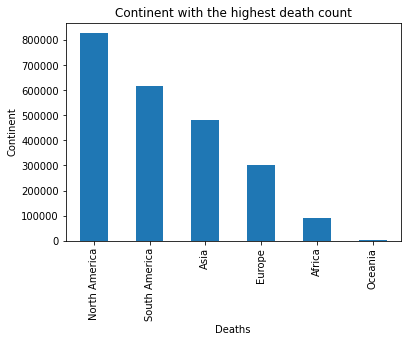

In [39]:
#visualization
con.plot.bar();
plt.xticks(rotation= 'vertical', size=10)
plt.title("Continent with the highest death count")
plt.ylabel("Continent")
plt.xlabel("Deaths");